朱乐豪 2100011043 HW3

（1）验证格式的稳定性条件，观察到发散现象

In [38]:
import numpy as np
import matplotlib.pyplot as plt

class solve_wave_eq:
    def __init__(self, L, T, Nx, Nt, a=1): 
        self.L = L #空间区域长度
        self.T = T #时间区域长度
        self.Nx = Nx #空间步数
        self.Nt = Nt #时间步数
        self.x = np.linspace(0, L, Nx+1)  # 空间网格
        self.t = np.linspace(0, T, Nt+1)  # 时间网格
        self.dx = L / Nx #空间步长
        self.dt = T / Nt #时间步长
        self.a = a #系数（默认为1）

    def CFL(self):
        return self.a*self.dt/self.dx

    def init_cond(self):
        return np.sin(2*np.pi*self.x)
    
    # FTCS求解
    def FTCS(self):
        
        # 初始化 初始条件
        u = np.zeros((self.Nx+1, self.Nt+1))
        u[:, 0] = self.init_cond()  

        for n in range(0, self.Nt):
            # 周期边界条件
            u[0, n+1] = u[0, n] - self.CFL() / 2 * (u[1, n] - u[self.Nx-1, n])
            u[self.Nx, n+1] = u[0, n+1]
            for j in range(1, self.Nx):
                u[j, n+1] = u[j, n] - self.CFL() / 2 * (u[j+1, n] - u[j-1, n])

        return u
    
    # lax求解
    def lax(self):
        
        # 初始化 初始条件
        u = np.zeros((self.Nx+1, self.Nt+1))
        u[:, 0] = self.init_cond() 

        for n in range(0, self.Nt):
            # 周期边界条件
            u[0, n+1] = 0.5*(1 - self.CFL())*u[1, n] + 0.5*(1+self.CFL())*u[self.Nx-1, n]
            u[self.Nx, n+1] = u[0, n+1]
            for j in range(1, self.Nx):
                u[j, n+1] = 0.5*(1 - self.CFL())*u[j+1, n] + 0.5*(1 + self.CFL())*u[j-1, n]

        return u

    # 一阶迎风
    def upwind(self):
        
        # 初始化 初始条件
        u = np.zeros((self.Nx+1, self.Nt+1))
        u[:, 0] = self.init_cond()

        for n in range(0, self.Nt):
            # 周期边界条件
            u[0, n+1] = u[0, n] - self.CFL()*(u[0, n] - u[self.Nx-1, n])
            u[self.Nx, n+1] = u[0, n+1]
            for j in range(1, self.Nx):
                u[j, n+1] = u[j, n] - self.CFL()*(u[j, n] - u[j-1, n])
            
        return u


FTCS

对于一阶波动方程，使用前向时间差分和中心空间差分数值格式可以写成：
$$
u_j^{n+1} = u_j^n - \frac{\Delta t}{2 \Delta x}(u_{j+1}^n - u_{j-1}^n) \tag{3}
$$
此格式的修正方程为
$$
u_t + u_x = -\frac{\Delta x}{2}cu_{xx} - \frac{\Delta x^2}{6}(1+2c^2)u_{xxx} - \frac{\Delta x^3}{12}c(2+c^2)u_{xxxx} + \dots \tag{4}
$$
这里c为CFL。从修正方程可以看出，格式的截断误差是二阶项，并且总有$\mu_2 = -\frac{1}{2}c\Delta x < 0$。根据Fourier稳定性分析方法，可以得到它的放大因子
$$
G = 1 - ic\sin(k\Delta x) \tag{5}
$$
要想$|G|\leq 1$，只能$c = 0$，方程的FTCS格式恒不稳定。

In [39]:
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    solution1 = solve_wave_eq(L=3, T=i, Nx=300, Nt=10000)
    print(f"使用FTCS求解, T={solution1.T}, CFL={solution1.CFL():.2f}, u在空间域上最大值为 {np.max(solution1.FTCS()[:, solution1.Nt-1])}, {'不发散' if np.max(solution1.FTCS()[:, solution1.Nt-1])<100 else '发散'}") 

使用FTCS求解, T=1, CFL=0.01, u在空间域上最大值为 1.0019617100231666, 不发散
使用FTCS求解, T=2, CFL=0.02, u在空间域上最大值为 1.0078699073875745, 不发散
使用FTCS求解, T=3, CFL=0.03, u在空间域上最大值为 1.0177942454621285, 不发散
使用FTCS求解, T=4, CFL=0.04, u在空间域上最大值为 1.0318523304959815, 不发散
使用FTCS求解, T=5, CFL=0.05, u在空间域上最大值为 1.0502120413441958, 不发散
使用FTCS求解, T=6, CFL=0.06, u在空间域上最大值为 1.0730948733846626, 不发散
使用FTCS求解, T=7, CFL=0.07, u在空间域上最大值为 1.100932775975685, 不发散
使用FTCS求解, T=8, CFL=0.08, u在空间域上最大值为 1.1436429217870792, 不发散
使用FTCS求解, T=9, CFL=0.09, u在空间域上最大值为 132.27626041800804, 发散
使用FTCS求解, T=10, CFL=0.10, u在空间域上最大值为 1536887.6010908075, 发散
使用FTCS求解, T=11, CFL=0.11, u在空间域上最大值为 59596033374.58831, 发散
使用FTCS求解, T=12, CFL=0.12, u在空间域上最大值为 5678224842344431.0, 发散


可见确实出现了发散现象

LAX


$$
u_j^{n+1} = \frac{1}{2}(1-c)u_{j+1}^n + \frac{1}{2}(1+c)u_{j-1}^n \tag{6}
$$
使用Fourier稳定性分析法，格式（6）的放大因子为
$$
G = \cos(k\Delta x) - ic\sin(k\Delta x) \tag{7}
$$
显然，其稳定性条件$|G|\leq 1$给出$|c|\leq 1$。

In [50]:
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]:
    solution1 = solve_wave_eq(L=3, T=i, Nx=300, Nt=10000)
    print(f"使用Lax求解, T={solution1.T}, CFL={solution1.CFL():.2f}, u在空间域上最大值为 {np.max(solution1.lax()[:, solution1.Nt-1])}, {'不发散' if np.max(solution1.lax()[:, solution1.Nt-1])<100 else '发散'}") 


使用Lax求解, T=10, CFL=0.10, u在空间域上最大值为 3.2246907062643254e-09, 不发散
使用Lax求解, T=20, CFL=0.20, u在空间域上最大值为 5.837629494154514e-09, 不发散
使用Lax求解, T=30, CFL=0.30, u在空间域上最大值为 1.5698671291789263e-08, 不发散
使用Lax求解, T=40, CFL=0.40, u在空间域上最大值为 6.269706993331143e-08, 不发散
使用Lax求解, T=50, CFL=0.50, u在空间域上最大值为 3.714922813420377e-07, 不发散
使用Lax求解, T=60, CFL=0.60, u在空间域上最大值为 3.2672226863405184e-06, 不发散
使用Lax求解, T=70, CFL=0.70, u在空间域上最大值为 4.263347532286995e-05, 不发散
使用Lax求解, T=80, CFL=0.80, u在空间域上最大值为 0.0008241977859657011, 不发散
使用Lax求解, T=90, CFL=0.90, u在空间域上最大值为 0.02359343920771846, 不发散
使用Lax求解, T=100, CFL=1.00, u在空间域上最大值为 1.0, 不发散


C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:50: RuntimeWarning: overflow encountered in scalar add
  u[j, n+1] = 0.5*(1 - self.CFL())*u[j+1, n] + 0.5*(1 + self.CFL())*u[j-1, n]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:50: RuntimeWarning: overflow encountered in scalar multiply
  u[j, n+1] = 0.5*(1 - self.CFL())*u[j+1, n] + 0.5*(1 + self.CFL())*u[j-1, n]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:50: RuntimeWarning: invalid value encountered in scalar add
  u[j, n+1] = 0.5*(1 - self.CFL())*u[j+1, n] + 0.5*(1 + self.CFL())*u[j-1, n]


使用Lax求解, T=110, CFL=1.10, u在空间域上最大值为 nan, 发散


C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:47: RuntimeWarning: overflow encountered in scalar add
  u[0, n+1] = 0.5*(1 - self.CFL())*u[1, n] + 0.5*(1+self.CFL())*u[self.Nx-1, n]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:47: RuntimeWarning: overflow encountered in scalar multiply
  u[0, n+1] = 0.5*(1 - self.CFL())*u[1, n] + 0.5*(1+self.CFL())*u[self.Nx-1, n]


使用Lax求解, T=120, CFL=1.20, u在空间域上最大值为 nan, 发散
使用Lax求解, T=130, CFL=1.30, u在空间域上最大值为 nan, 发散


可见在c>1时确实出现了发散

Upwind

与Lax进行类似分析可以得到相同的稳定条件

In [49]:
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]:
    solution1 = solve_wave_eq(L=3, T=i, Nx=300, Nt=10000)
    print(f"使用一阶迎风求解, T={solution1.T}, CFL={solution1.CFL():.2f}, u在空间域上最大值为 {np.max(solution1.upwind()[:, solution1.Nt-1])}, {'不发散' if np.max(solution1.upwind()[:, solution1.Nt-1])<100 else '发散'}") 


使用一阶迎风求解, T=10, CFL=0.10, u在空间域上最大值为 0.16923939530356968, 不发散
使用一阶迎风求解, T=20, CFL=0.20, u在空间域上最大值为 0.042511874911750076, 不发散
使用一阶迎风求解, T=30, CFL=0.30, u在空间域上最大值为 0.015840004261563782, 不发散
使用一阶迎风求解, T=40, CFL=0.40, u在空间域上最大值为 0.008758054186189395, 不发散
使用一阶迎风求解, T=50, CFL=0.50, u在空间域上最大值为 0.007186046232104483, 不发散
使用一阶迎风求解, T=60, CFL=0.60, u在空间域上最大值为 0.008758054186189392, 不发散
使用一阶迎风求解, T=70, CFL=0.70, u在空间域上最大值为 0.01584000426156374, 不发散
使用一阶迎风求解, T=80, CFL=0.80, u在空间域上最大值为 0.042511874911750014, 不发散
使用一阶迎风求解, T=90, CFL=0.90, u在空间域上最大值为 0.16923939530356902, 不发散
使用一阶迎风求解, T=100, CFL=1.00, u在空间域上最大值为 1.0, 不发散


C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:66: RuntimeWarning: overflow encountered in scalar multiply
  u[j, n+1] = u[j, n] - self.CFL()*(u[j, n] - u[j-1, n])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:66: RuntimeWarning: overflow encountered in scalar subtract
  u[j, n+1] = u[j, n] - self.CFL()*(u[j, n] - u[j-1, n])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:66: RuntimeWarning: invalid value encountered in scalar subtract
  u[j, n+1] = u[j, n] - self.CFL()*(u[j, n] - u[j-1, n])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:63: RuntimeWarning: overflow encountered in scalar subtract
  u[0, n+1] = u[0, n] - self.CFL()*(u[0, n] - u[self.Nx-1, n])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_24588\4171905871.py:63: RuntimeWarning: invalid value encountered in scalar subtract
  u[0, n+1] = u[0, n] - self.CFL()*(u[0, n] - u[self.Nx-1, n])


使用一阶迎风求解, T=110, CFL=1.10, u在空间域上最大值为 nan, 发散
使用一阶迎风求解, T=120, CFL=1.20, u在空间域上最大值为 nan, 发散
使用一阶迎风求解, T=130, CFL=1.30, u在空间域上最大值为 nan, 发散


c>1时发散

（2）验证格式的精度阶数;

空间精度

1: CFL = 0.03, dx = 0.030, dt = 0.001
2: CFL = 0.05, dx = 0.020, dt = 0.001
3: CFL = 0.07, dx = 0.015, dt = 0.001
4: CFL = 0.08, dx = 0.012, dt = 0.001
5: CFL = 0.10, dx = 0.010, dt = 0.001
6: CFL = 0.12, dx = 0.009, dt = 0.001
7: CFL = 0.13, dx = 0.007, dt = 0.001
FTCS空间差分精度估计： 0.00 阶
Lax空间差分精度估计： -0.23 阶
Upwind空间差分精度估计： 0.43 阶


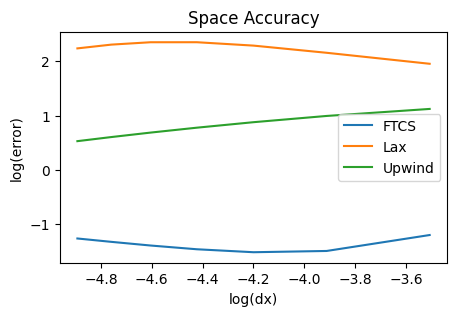

In [43]:
test_id = 0 
err_FTCS = []
err_lax = []
err_upwind = []
dx = []
for Nx in [100, 150, 200, 250, 300, 350, 400]:  
    test_id += 1   
    solution3 = solve_wave_eq(L=3, T=1, Nx=Nx, Nt=1000)
    dx.append(solution3.dx)
    print(f"{test_id}: CFL = {solution3.CFL():.2f}, dx = {solution3.dx:.3f}, dt = {solution3.dt:.3f}")
    
    u_ftcs = solution3.FTCS()
    u_lax = solution3.lax()
    u_upwind = solution3.upwind()
    
    def u_exact(x, t):
        return np.sin(2*np.pi*(x-t))
    u_e = u_exact(x=solution3.x, t=solution3.t[solution3.Nt-1])

    def cal_err(u1, u2):
        return np.linalg.norm(u1 - u2)

    err_FTCS.append(cal_err(u_ftcs[:, solution3.Nt-1], u_e))
    err_lax.append(cal_err(u_lax[:, solution3.Nt-1], u_e))
    err_upwind.append(cal_err(u_upwind[:, solution3.Nt-1], u_e))


# 对误差和步长的对数进行线性拟合，斜率即为数值精度
coefficients_ftcs = np.polyfit(np.log(dx), np.log(err_FTCS), 1)
coefficients_lax = np.polyfit(np.log(dx), np.log(err_lax), 1)
coefficients_upwind = np.polyfit(np.log(dx), np.log(err_upwind), 1)

slope_ftcs, intercept_ftcs = coefficients_ftcs
slope_lax, intercept_lax = coefficients_lax
slope_upwind, intercept_upwind = coefficients_upwind

print(f"FTCS空间差分精度估计： {slope_ftcs:.2f} 阶")
print(f"Lax空间差分精度估计： {slope_lax:.2f} 阶")
print(f"Upwind空间差分精度估计： {slope_upwind:.2f} 阶")

plt.figure(figsize=(5, 3))
plt.plot(np.log(dx), np.log(err_FTCS), label="FTCS")
plt.plot(np.log(dx), np.log(err_lax), label="Lax")
plt.plot(np.log(dx), np.log(err_upwind), label="Upwind")
plt.title("Space Accuracy")
plt.xlabel('log(dx)')
plt.ylabel('log(error)')
plt.legend()
plt.show()

时间精度

1: CFL = 0.10, dx = 0.010, dt = 0.001
2: CFL = 0.08, dx = 0.010, dt = 0.001
3: CFL = 0.07, dx = 0.010, dt = 0.001
4: CFL = 0.06, dx = 0.010, dt = 0.001
5: CFL = 0.06, dx = 0.010, dt = 0.001
6: CFL = 0.05, dx = 0.010, dt = 0.001
7: CFL = 0.05, dx = 0.010, dt = 0.000
8: CFL = 0.04, dx = 0.010, dt = 0.000
FTCS时间差分精度估计： 0.90 阶
Lax时间差分精度估计： -0.16 阶
Upwind时间差分精度估计： -0.06 阶


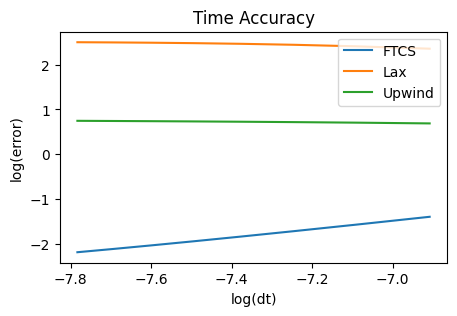

In [44]:
test_id = 0 
err_FTCS = []
err_lax = []
err_upwind = []
dt = []
for Nt in [1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]:  
    test_id += 1   
    solution3 = solve_wave_eq(L=3, T=1, Nx=300, Nt=Nt)
    dt.append(solution3.dt)
    print(f"{test_id}: CFL = {solution3.CFL():.2f}, dx = {solution3.dx:.3f}, dt = {solution3.dt:.3f}")
    
    u_ftcs = solution3.FTCS()
    u_lax = solution3.lax()
    u_upwind = solution3.upwind()
    
    def u_exact(x, t):
        return np.sin(2*np.pi*(x-t))
    u_e = u_exact(x=solution3.x, t=solution3.t[solution3.Nt-1])

    def cal_err(u1, u2):
        return np.linalg.norm(u1 - u2)

    err_FTCS.append(cal_err(u_ftcs[:, solution3.Nt-1], u_e))
    err_lax.append(cal_err(u_lax[:, solution3.Nt-1], u_e))
    err_upwind.append(cal_err(u_upwind[:, solution3.Nt-1], u_e))


# 对误差和步长的对数进行线性拟合，斜率即为数值精度
coefficients_ftcs = np.polyfit(np.log(dt), np.log(err_FTCS), 1)
coefficients_lax = np.polyfit(np.log(dt), np.log(err_lax), 1)
coefficients_upwind = np.polyfit(np.log(dt), np.log(err_upwind), 1)

slope_ftcs, intercept_ftcs = coefficients_ftcs
slope_lax, intercept_lax = coefficients_lax
slope_upwind, intercept_upwind = coefficients_upwind

print(f"FTCS时间差分精度估计： {slope_ftcs:.2f} 阶")
print(f"Lax时间差分精度估计： {slope_lax:.2f} 阶")
print(f"Upwind时间差分精度估计： {slope_upwind:.2f} 阶")

plt.figure(figsize=(5, 3))
plt.plot(np.log(dt), np.log(err_FTCS), label="FTCS")
plt.plot(np.log(dt), np.log(err_lax), label="Lax")
plt.plot(np.log(dt), np.log(err_upwind), label="Upwind")
plt.title("Time Accuracy")
plt.xlabel('log(dt)')
plt.ylabel('log(error)')
plt.legend()
plt.show()

可见时间和空间精度与预期仍有一定差距。推测可能的原因有：
（1）FTCS的恒不稳定性影响
（2）选择的T,X,dt，dx不合适导致误差

（3）观察数值解的耗散以及相位的超前和滞后

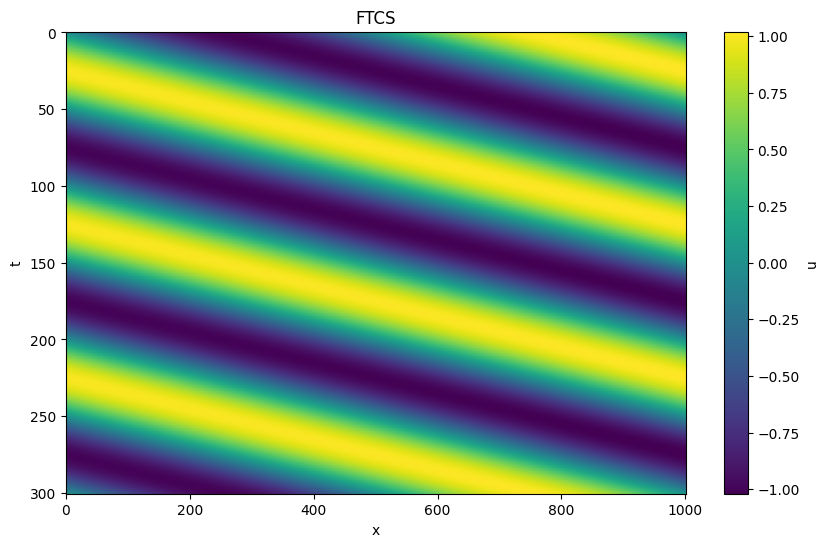

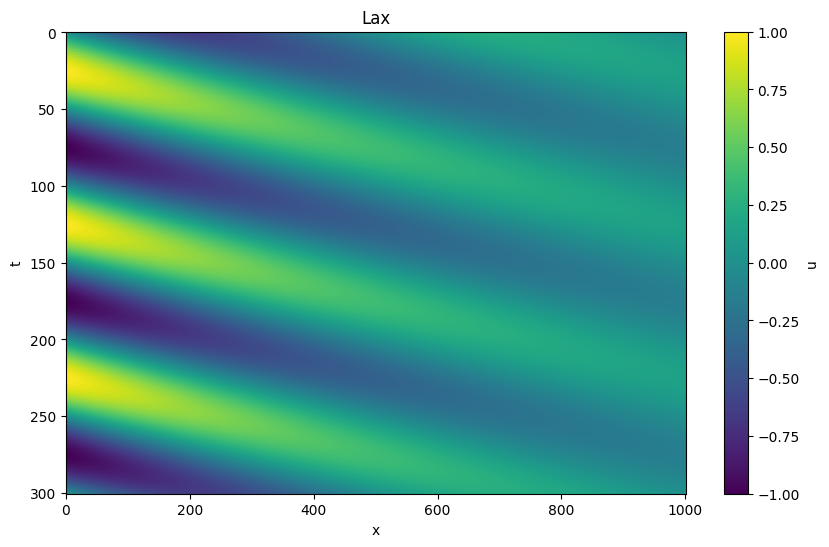

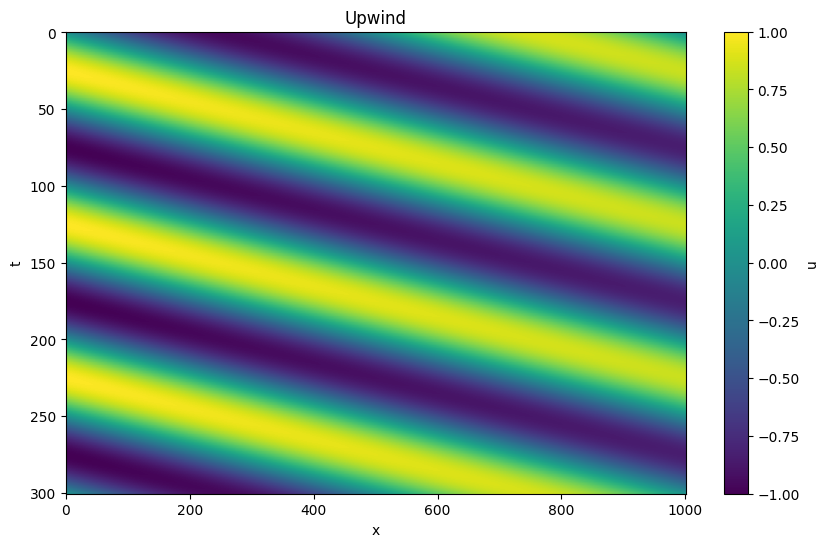

In [45]:
# 绘制三种格式在t从0-1，x从0-3的热图

solution4 = solve_wave_eq(L=3, T=1, Nx=300, Nt=1000)
u_ftcs = solution4.FTCS()
u_lax = solution4.lax()
u_upwind = solution4.upwind()

plt.figure(figsize=(10, 6))
plt.imshow(u_ftcs, cmap='viridis', aspect='auto')
plt.colorbar(label='u')
plt.xlabel('x')
plt.ylabel('t')
plt.title('FTCS')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(u_lax, cmap='viridis', aspect='auto')
plt.colorbar(label='u')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Lax')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(u_upwind, cmap='viridis', aspect='auto')
plt.colorbar(label='u')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Upwind')
plt.show()

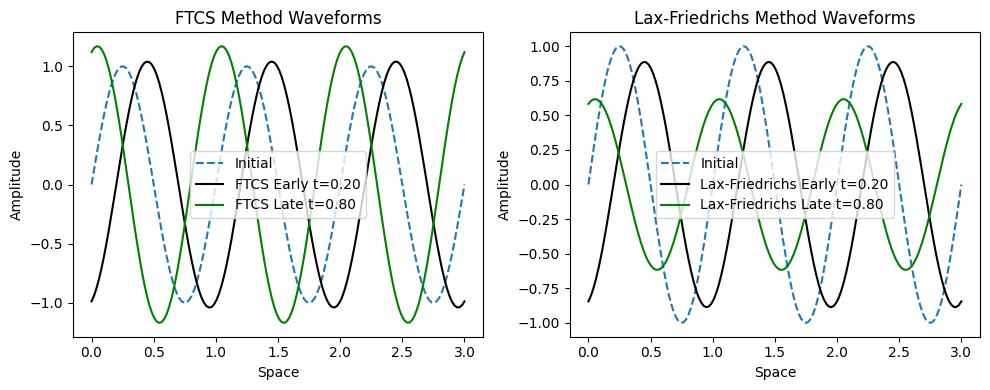

In [52]:
# 初始条件和参数设置
L = 3  # x的范围从0到3
T = 1
Nx = 150  # 空间网格点数量
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]
dt = 0.01  # 时间步长
Nt = 100  # 时间步数
t = np.arange(0, Nt*dt, dt)

# 初始条件
u_initial = np.sin(2 * np.pi * x)

# FTCS方法
def solve_ftcs(u_init):
    u = np.zeros((Nx, Nt))
    u[:, 0] = u_init
    for n in range(0, Nt-1):
        for j in range(1, Nx-1):
            u[j, n+1] = u[j, n] - dt/(2*dx) * (u[j+1, n] - u[j-1, n])
        # 应用周期边界条件
        u[0, n+1] = u[0, n] - dt/(2*dx) * (u[1, n] - u[-2, n])
        u[-1, n+1] = u[0, n+1]
    return u

# Lax-Friedrichs方法
def solve_lax_friedrichs(u_init):
    u = np.zeros((Nx, Nt))
    u[:, 0] = u_init
    for n in range(0, Nt-1):
        for j in range(1, Nx-1):
            u[j, n+1] = 0.5 * (u[j+1, n] + u[j-1, n]) - dt/(2*dx) * (u[j+1, n] - u[j-1, n])
        # 应用周期边界条件
        u[0, n+1] = 0.5 * (u[1, n] + u[-2, n]) - dt/(2*dx) * (u[1, n] - u[-2, n])
        u[-1, n+1] = u[0, n+1]
    return u

u_ftcs = solve_ftcs(u_initial)
u_lax_friedrichs = solve_lax_friedrichs(u_initial)

# 选择特定的时间点进行比较：一个较早的时间点和一个较晚的时间点
early_time_step = 20
late_time_step = 80

# 绘图
plt.figure(figsize=(10, 4))

# FTCS方法的波形
plt.subplot(1, 2, 1)
plt.plot(x, u_initial, label='Initial', linestyle='--')
plt.plot(x, u_ftcs[:, early_time_step], color='black', label=f'FTCS Early t={early_time_step*dt:.2f}')
plt.plot(x, u_ftcs[:, late_time_step], color='green', label=f'FTCS Late t={late_time_step*dt:.2f}')
plt.title('FTCS Method Waveforms')
plt.xlabel('Space')
plt.ylabel('Amplitude')
plt.legend()

# Lax-Friedrichs方法的波形
plt.subplot(1, 2, 2)
plt.plot(x, u_initial, label='Initial', linestyle='--')
plt.plot(x, u_lax_friedrichs[:, early_time_step], color='black', label=f'Lax-Friedrichs Early t={early_time_step*dt:.2f}')
plt.plot(x, u_lax_friedrichs[:, late_time_step], color='green', label=f'Lax-Friedrichs Late t={late_time_step*dt:.2f}')
plt.title('Lax-Friedrichs Method Waveforms')
plt.xlabel('Space')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

通过观察热图和波形图可见以下现象：
1. 耗散：随着时间（和空间）波形振幅逐渐减小，说明能量在数值解中耗散
2. 相比真实值，数值解的相位存在一定超前和滞后现象